# Food Categories
### 101 food types

In [6]:
import fastai
fastai.show_install(0)



```text
=== Software === 
python version  : 3.6.5
fastai version  : 1.0.18
torch version   : 1.0.0.dev20181022
nvidia driver   : 396.44
torch cuda ver  : 9.2.148
torch cuda is   : available
torch cudnn ver : 7104
torch cudnn is  : enabled

=== Hardware === 
nvidia gpus     : 1
torch available : 1
  - gpu0        : 7611MB | Tesla P4

=== Environment === 
platform        : Linux-4.9.0-8-amd64-x86_64-with-debian-9.5
distro          : #1 SMP Debian 4.9.110-3+deb9u6 (2018-10-08)
conda env       : Unknown
python          : /opt/anaconda3/bin/python
sys.path        : 
/opt/anaconda3/lib/python36.zip
/opt/anaconda3/lib/python3.6
/opt/anaconda3/lib/python3.6/lib-dynload
/opt/anaconda3/lib/python3.6/site-packages
/opt/anaconda3/lib/python3.6/site-packages/IPython/extensions
/home/jupyter/.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be ins

In [7]:
import glob
from io import BytesIO
import numpy as np

In [8]:
from fastai import *
from fastai.vision import *

In [9]:
#path=Path('')
path = Path('../data/subset')

In [5]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
       ds_tfms=get_transforms(), size=224, num_workers=4, bs=32).normalize(imagenet_stats)

In [6]:
!pwd

/home/jupyter/projects/food/notebooks


# resnet34

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito'],
 10,
 7994,
 2006)

### View data

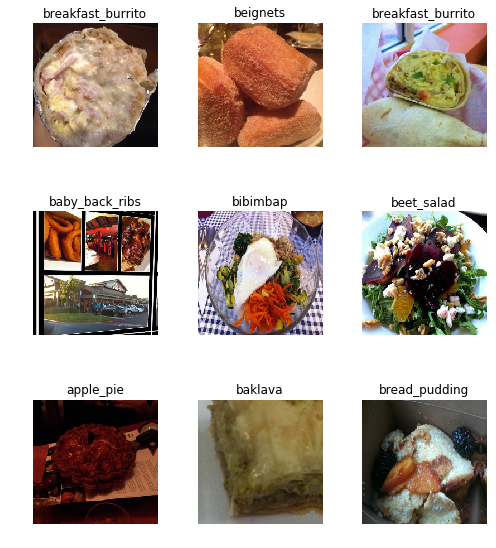

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(3)

Total time: 02:22
epoch  train_loss  valid_loss  error_rate
1      0.949391    0.678073    0.236291    (00:47)
2      0.677088    0.548842    0.182453    (00:46)
3      0.510017    0.514509    0.175474    (00:48)



In [11]:
learn.unfreeze()

In [12]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


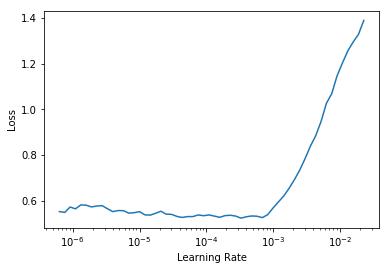

In [13]:
learn.recorder.plot()

In [14]:
learn.save('resnet34-stage-1')

In [15]:
learn.fit_one_cycle(3, max_lr=slice(3e-5,3e-3))

Total time: 02:57
epoch  train_loss  valid_loss  error_rate
1      0.696162    0.854820    0.249252    (00:58)
2      0.535910    0.435501    0.147557    (00:59)
3      0.276394    0.372171    0.126122    (00:59)



In [16]:
learn.save('resnet34-stage-2')

## Interpretation

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

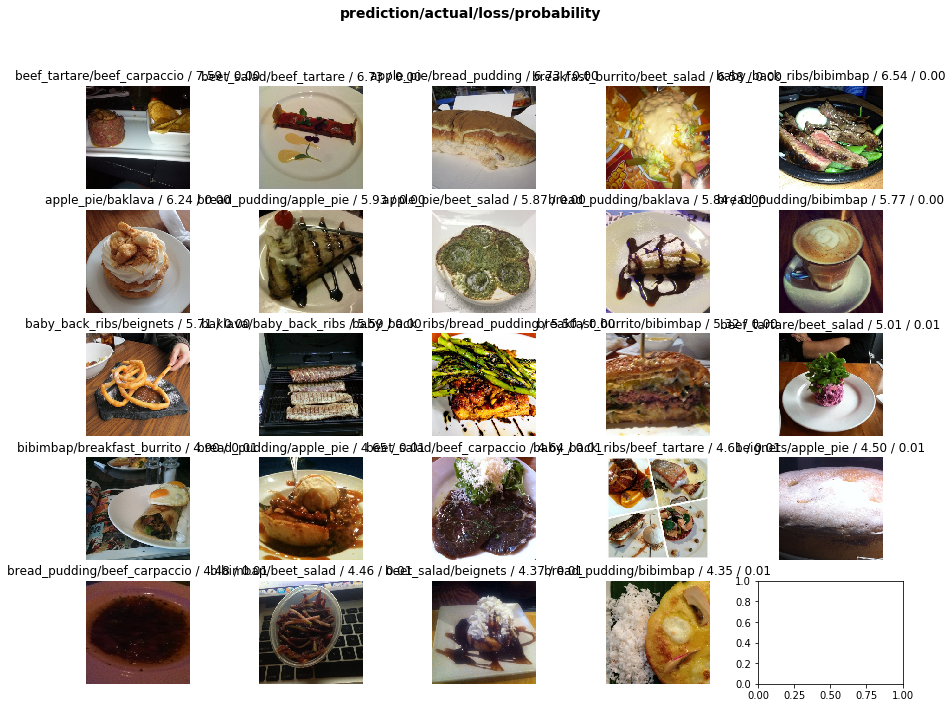

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

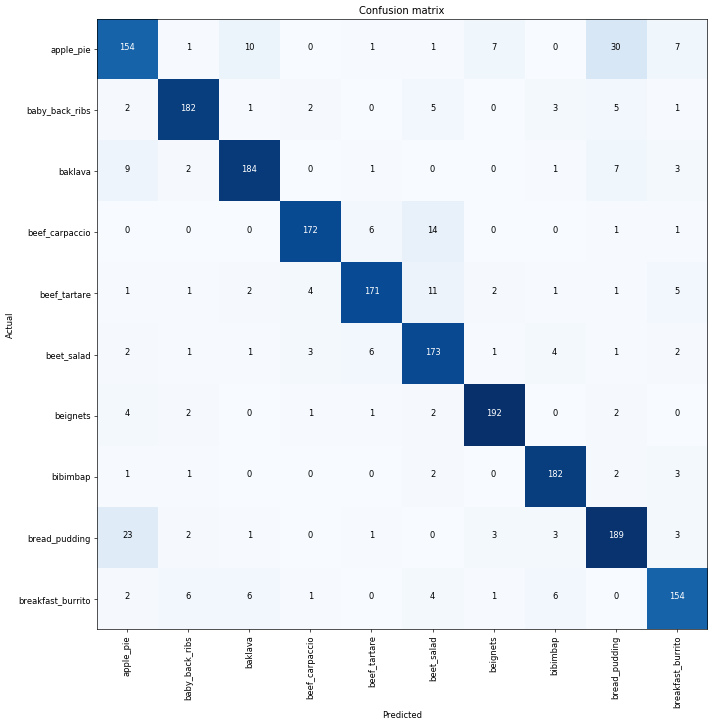

In [21]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [22]:
interp.most_confused(min_val=5)

[('apple_pie', 'bread_pudding', 30),
 ('bread_pudding', 'apple_pie', 23),
 ('beef_carpaccio', 'beet_salad', 14),
 ('beef_tartare', 'beet_salad', 11),
 ('apple_pie', 'baklava', 10),
 ('baklava', 'apple_pie', 9),
 ('apple_pie', 'beignets', 7),
 ('apple_pie', 'breakfast_burrito', 7),
 ('baklava', 'bread_pudding', 7),
 ('beef_carpaccio', 'beef_tartare', 6),
 ('beet_salad', 'beef_tartare', 6),
 ('breakfast_burrito', 'baby_back_ribs', 6),
 ('breakfast_burrito', 'baklava', 6),
 ('breakfast_burrito', 'bibimbap', 6)]

---

# resnet50

In [ ]:
data = ImageDataBunch.from_df("", subset_df, ds_tfms=get_transforms(), size=224, bs=32)

### View data

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

In [ ]:
learn = create_cnn(data, models.resnet50, metrics=error_rate, model_dir="models")
#learn.model = torch.nn.DataParallel(learn.model)

In [ ]:
learn.fit_one_cycle(4)

## Unfreezing, fine-tuning, and learning rates

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
doc(learn.lr_find)

In [ ]:
learn.recorder.plot()

In [ ]:
learn.save('resnet50-stage1')

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(3e-7,3e-4))

In [ ]:
learn.load('resnet50-stage1')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

In [ ]:
learn.save('resnet50-stage2')

## Interpretation

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.most_confused(min_val=2)

## Check model paths

In [ ]:
!ls -lt model

In [ ]:
!ls -lt models/

## Save final model

In [ ]:
final_model_name = ' '

## Predicting for New Images

In [ ]:
learn.load(final_model_name)

In [ ]:
data2 = ImageDataBunch.single_from_classes("", 
                                           learn.data.classes,
                                          tfms=get_transforms(),
                                          size=224).normalize(imagenet_stats)
learn2 = create_cnn(data2, models.resnet34)
learn2.load(final_model_name)

In [ ]:
data.classes

In [ ]:
data2.classes, data2.c

In [ ]:
url = "https://www.maangchi.com/wp-content/uploads/2008/01/dolsotbibimbap-stove.jpg"

In [ ]:
url = "https://d3cizcpymoenau.cloudfront.net/images/25879/SFS_Baklava_026.jpg"

In [ ]:
response = requests.get(url)
img = open_image(BytesIO(response.content))
img

In [ ]:
pred_class, pred_idx, outputs = learn.predict(img)

In [ ]:
learn.predict(img)

In [ ]:
print(pred_class, pred_idx, outputs, outputs[pred_idx])

In [ ]:
pred_class, pred_idx, outputs = learn2.predict(img)

In [ ]:
learn2.predict(img)

In [ ]:
print(pred_class, pred_idx, outputs, outputs[pred_idx])

## Copy "models" folder to root level

In [12]:
path.ls()

[PosixPath('../data/subset/train'), PosixPath('../data/subset/models')]

In [10]:
import shutil

In [11]:
shutil.rmtree("../models",ignore_errors=True)
shutil.copytree(path/"models", "../models")

'../models'

In [16]:
classes = ["apple_pie", "baby_back_ribs", "baklava", "beef_carpaccio", "beef_tartare", \
           "beet_salad", "beignets", "bibimbap", "bread_pudding", "breakfast_burrito"]

In [17]:
import json

In [18]:
with open('../models/classes.txt','w') as f:
    json.dump(classes, f)

In [19]:
!cat ../models/classes.txt

["apple_pie", "baby_back_ribs", "baklava", "beef_carpaccio", "beef_tartare", "beet_salad", "beignets", "bibimbap", "bread_pudding", "breakfast_burrito"]